In [1]:
import math
import numpy as np
import ceo
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display
%pylab inline

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
nLenslet = 1
nPx = 256
D = 25.5
#onAxis = ceo.Source("R",zenith=0.*math.pi/180/3600,azimuth=0*math.pi/4,
#                    rays_box_size=D,rays_box_sampling=nPx,rays_origin=[0.0,0.0,-25])
src    = ceo.Source("J",rays_box_size=D,rays_box_sampling=nPx,rays_origin=[0.0,0.0,25])
gmt = ceo.GMT_MX(D,nPx,M1_radial_order=10,M2_radial_order=10)
sps = ceo.SegmentPistonSensor(gmt.M1,src,nyquist_factor=2)

In [3]:
def pistonSensor(segId=1,segStroke=0):
    
    gmt.reset()
    gmt.M1.motion_CS.origin[segId-1,2] = segStroke*1e-6
    gmt.M1.motion_CS.update()
    src.reset()
    gmt.propagate(src)
    sps.camera.reset()
    sps.propagate(src)
    
    fig, (ax1,ax2) = subplots(ncols=2)
    fig.set_size_inches((20,20))
    
    h1 = ax1.imshow(src.phase.host(units='micron'),interpolation='None',origin='lower')
    ax1.grid()
    #colorbar(h1,ax=ax1)
        
    h2 = ax2.imshow(sps.camera.frame.host(),interpolation='None',origin='lower')
    #colorbar(h2,ax=ax2)

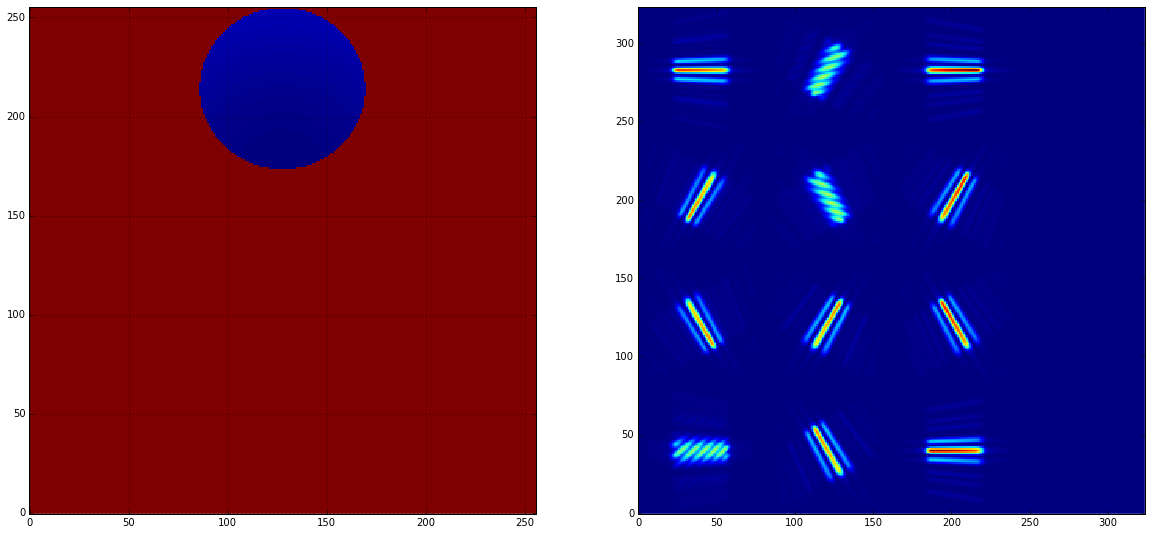

In [4]:
i = interact(pistonSensor,segId=[1,7],segStroke=[-20.0,20.0])

In [7]:
def pistonSensorFFT(segId=1,segStroke=0):
    
    gmt.reset()
    gmt.M1.motion_CS.origin[segId-1,2] = segStroke*1e-6
    gmt.M1.motion_CS.update()
    src.reset()
    gmt.propagate(src)
    sps.camera.reset()
    sps.propagate(src)
    
    fig, (ax1,ax2) = subplots(ncols=2)
    fig.set_size_inches((20,20))
    
    h1 = ax1.imshow(src.phase.host(units='micron'),interpolation='None',origin='lower')
    ax1.grid()
    #colorbar(h1,ax=ax1)
        
    sps.fftlet.reset()
    sps.fft()
    h2 = ax2.imshow(np.sqrt(sps.fftlet.host()),interpolation='None',origin='lower')
    #colorbar(h2,ax=ax2)

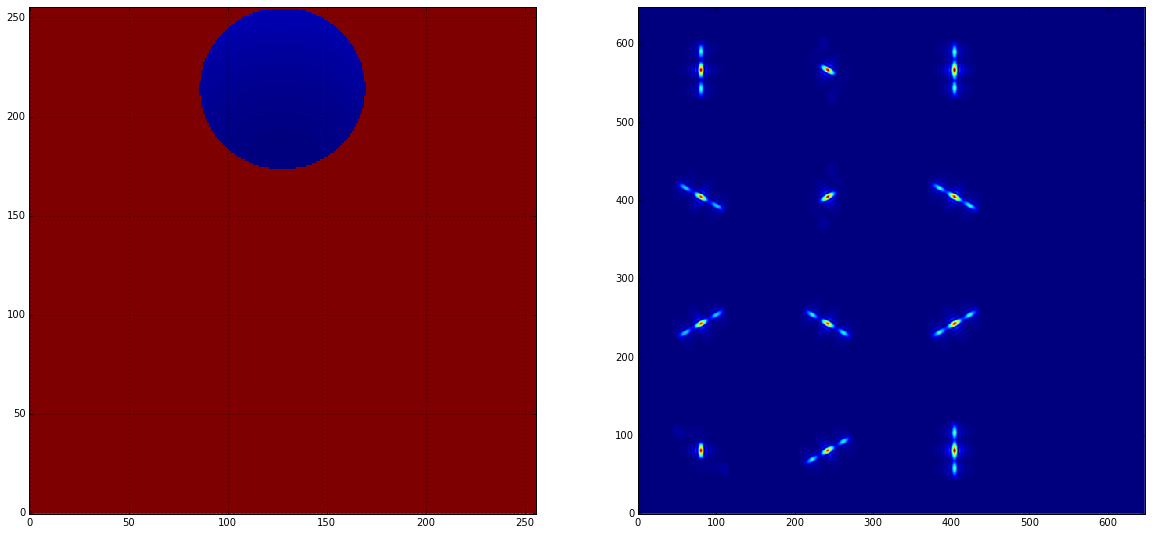

In [8]:
ii = interact(pistonSensorFFT,segId=[1,7],segStroke=[-20.0,20.0])

In [7]:
fftlet = sps.fftlet.host()
n = sps.camera.N_PX_IMAGE
data = np.zeros((n,n,sps.camera.N_SIDE_LENSLET**2))
k = 0
for j in range(sps.camera.N_SIDE_LENSLET):
    for i in range(sps.camera.N_SIDE_LENSLET):
        data[:,:,k] = fftlet[i*n:(i+1)*n,j*n:(j+1)*n]
        k += 1